In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")


In [3]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

There are 12 columns in train dataset, whereas 11 in the test dataset. The missing column in the test dataset is the target variable and we will train our model to predict that variable.

In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [5]:
# columns in the dataset
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

We can infer that "count" is our target variable as it is missing from the test dataset.

In [7]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


Type casting the datetime and numerical attributes to category


In [9]:
train['season']=train.season.astype('category')
train['holiday']=train.holiday.astype('category')
train['workingday']=train.workingday.astype('category')
train['weather']=train.weather.astype('category')

In [10]:
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


Text(0, 0.5, 'Frequency')

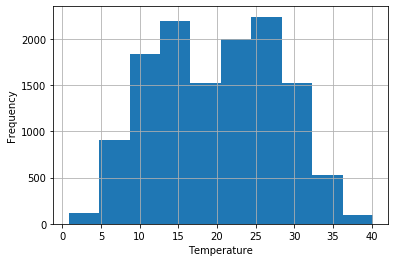

In [11]:
pt=train['temp'].hist()
pt.set_xlabel('Temperature')
pt.set_ylabel('Frequency')

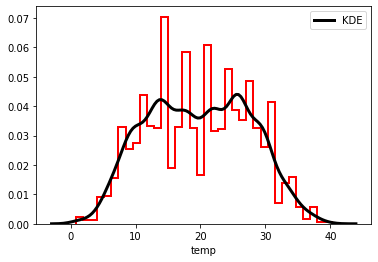

In [12]:
pp=sn.distplot(train['temp'],rug=False,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
               hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "r"})

Text(0, 0.5, 'Frequency')

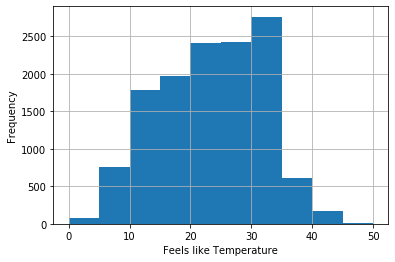

In [13]:
pt1=train['atemp'].hist()
pt1.set_xlabel('Feels like Temperature')
pt1.set_ylabel('Frequency')

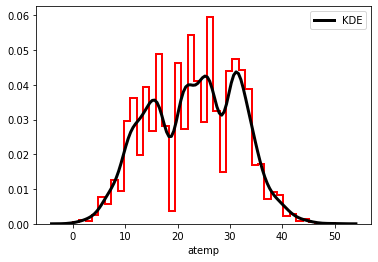

In [14]:
pp=sn.distplot(train['atemp'],rug=False,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
               hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "r"})

Text(0, 0.5, 'Frequency')

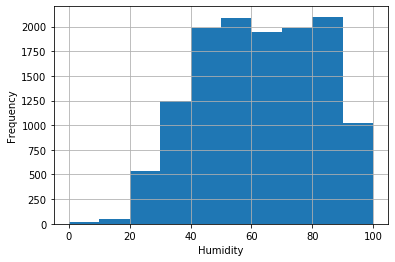

In [15]:
pt2=train['humidity'].hist()
pt2.set_xlabel('Humidity')
pt2.set_ylabel('Frequency')

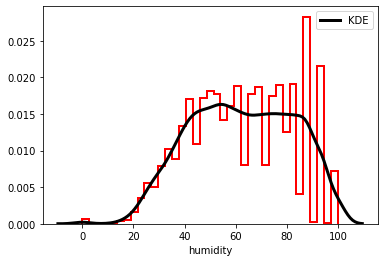

In [16]:
pp=sn.distplot(train['humidity'],rug=False,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
               hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "r"})

Text(0, 0.5, 'Frequency')

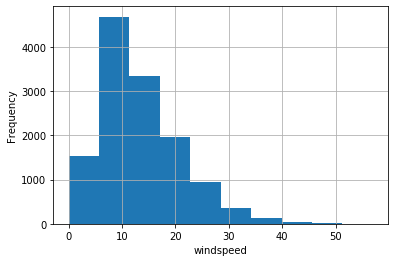

In [17]:
pt2=train['windspeed'].hist()
pt2.set_xlabel('windspeed')
pt2.set_ylabel('Frequency')


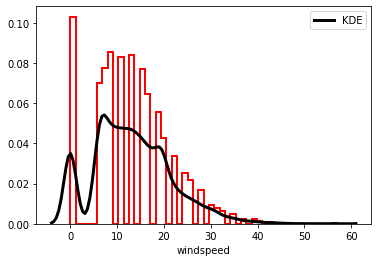

In [18]:
pp=sn.distplot(train['windspeed'],rug=False,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
               hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "r"})

1    8576
2    3273
3    1128
4       3
Name: weather, dtype: int64


Text(0.5, 0, 'Weather')

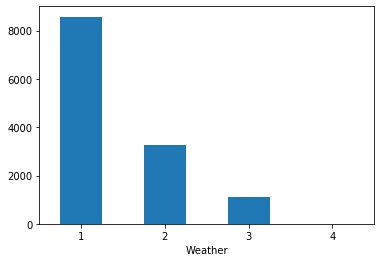

In [19]:
print(train['weather'].value_counts())
train['weather'].value_counts().plot(rot=0,kind='bar')
plt.xlabel('Weather')

2    4409
1    3980
3    2457
4    2134
Name: season, dtype: int64


Text(0.5, 0, 'season')

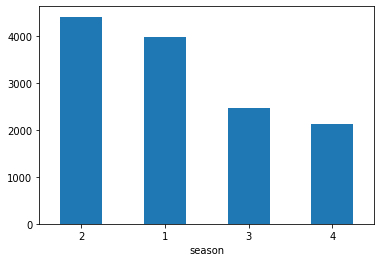

In [20]:
print(train['season'].value_counts())
train['season'].value_counts().plot(rot=0,kind='bar')
plt.xlabel('season')

1    8904
0    4076
Name: workingday, dtype: int64


Text(0.5, 1.0, 'Workingday')

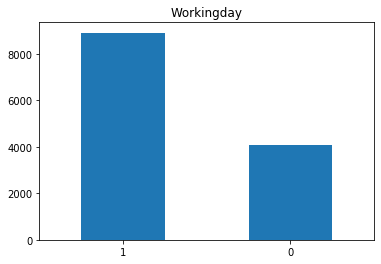

In [21]:
print(train['workingday'].value_counts())
train['workingday'].value_counts().plot.bar(rot=0)
plt.title('Workingday')


0    12623
1      357
Name: holiday, dtype: int64


Text(0.5, 1.0, 'Holiday')

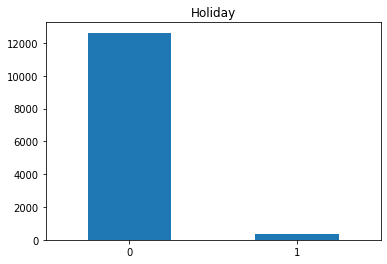

In [22]:
print(train['holiday'].value_counts())
train['holiday'].value_counts().plot.bar(rot=0)
#train['holiday'].hist()
plt.title('Holiday')

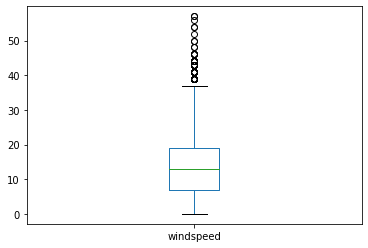

In [23]:
#train['temp'].plot.box()
#train['atemp'].plot.box()
train['windspeed'].plot.box()
#train['humidity'].plot.box()

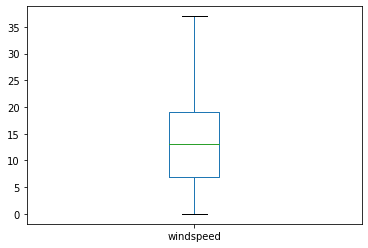

In [24]:
train['windspeed'].plot.box(showfliers=False)


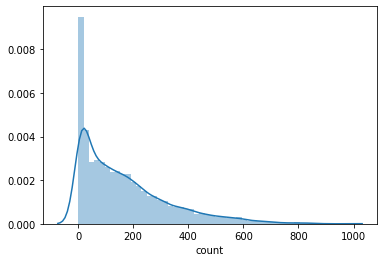

In [25]:
sn.distplot(train["count"])

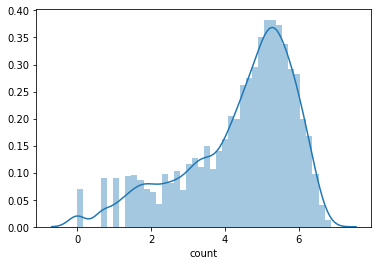

In [26]:
sn.distplot(np.log(train["count"]))

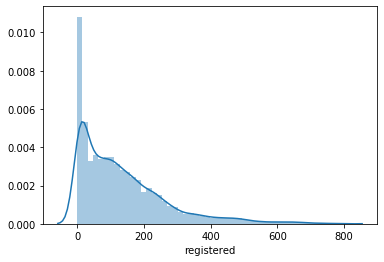

In [27]:
sn.distplot(train["registered"])

Text(0, 0.5, 'Count Of Bikes')

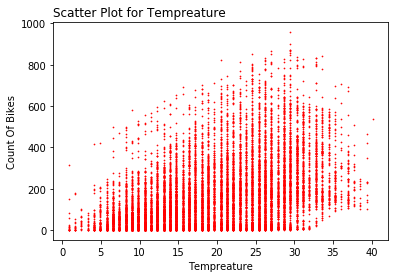

In [28]:
plt.plot(train['temp'],train['count'],color='r',linestyle='',marker='o',markersize=0.7)
plt.title('Scatter Plot for Tempreature',loc='left')
plt.xlabel('Tempreature')
plt.ylabel('Count Of Bikes')
#x_train.plot.scatter('temp',y_train[0])

Text(0, 0.5, 'Count Of Bikes')

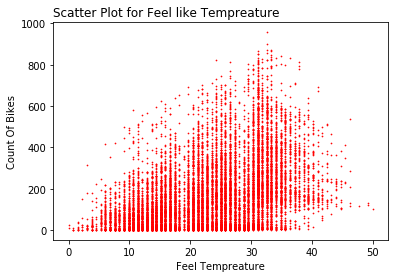

In [29]:
plt.plot(train['atemp'],train['count'],color='r',linestyle='',marker='o',markersize=0.7)
plt.title('Scatter Plot for Feel like Tempreature',loc='left')
plt.xlabel('Feel Tempreature')
plt.ylabel('Count Of Bikes')

Text(0, 0.5, 'Count Of Bikes')

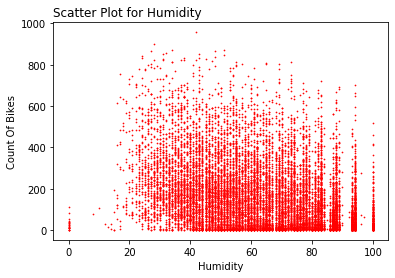

In [30]:
plt.plot(train['humidity'],train['count'],color='r',linestyle='',marker='o',markersize=0.7)
plt.title('Scatter Plot for Humidity',loc='left')
plt.xlabel('Humidity')
plt.ylabel('Count Of Bikes')

Text(0, 0.5, 'Count Of Bikes')

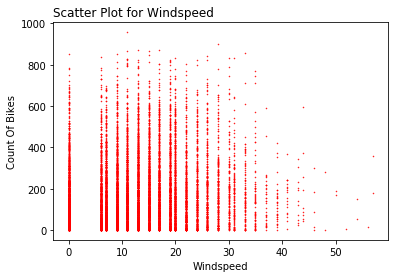

In [31]:
plt.plot(train['windspeed'],train['count'],color='r',linestyle='',marker='o',markersize=0.5)
plt.title('Scatter Plot for Windspeed',loc='left')
plt.xlabel('Windspeed')
plt.ylabel('Count Of Bikes')

You can also use to_datetime() function from pandas package to convert the date in datetime format and then extract features from it. 

Let's now build a linear regression model to get the predictions on the test data. We have to make the similar changes in test data as we have done for the training data.

In [32]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [33]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set. 

In [34]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

* We will drop the datetime, date variable as we have already extracted features from these variables.
* We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [35]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [36]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Model Building
## Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
# initialize the linear regression model
lModel = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [38]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])
#X_train.head()
#y_val.head()

In [39]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape
#X_train.head()

((10774, 11), (10774,), (2206, 11), (2206,))

In [40]:
# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)
#lModel.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [41]:
# making prediction on validation set
prediction = lModel.predict(X_val)
print(prediction)

[2.79051793 2.69546734 2.69630268 ... 5.260282   4.54753822 3.2617522 ]


Let's now calculate the rmsle value of the predictions

In [42]:
rmsle(y_val,prediction)

0.8875379204281797

We got a rmsle value of 0.8875 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.


## Model Building 
## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
# defining a decision tree model with a depth of 4. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=4)

Let's fit the decision tree model now.

In [44]:
dt_reg.fit(X_train, y_train)
#dt_reg.score(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

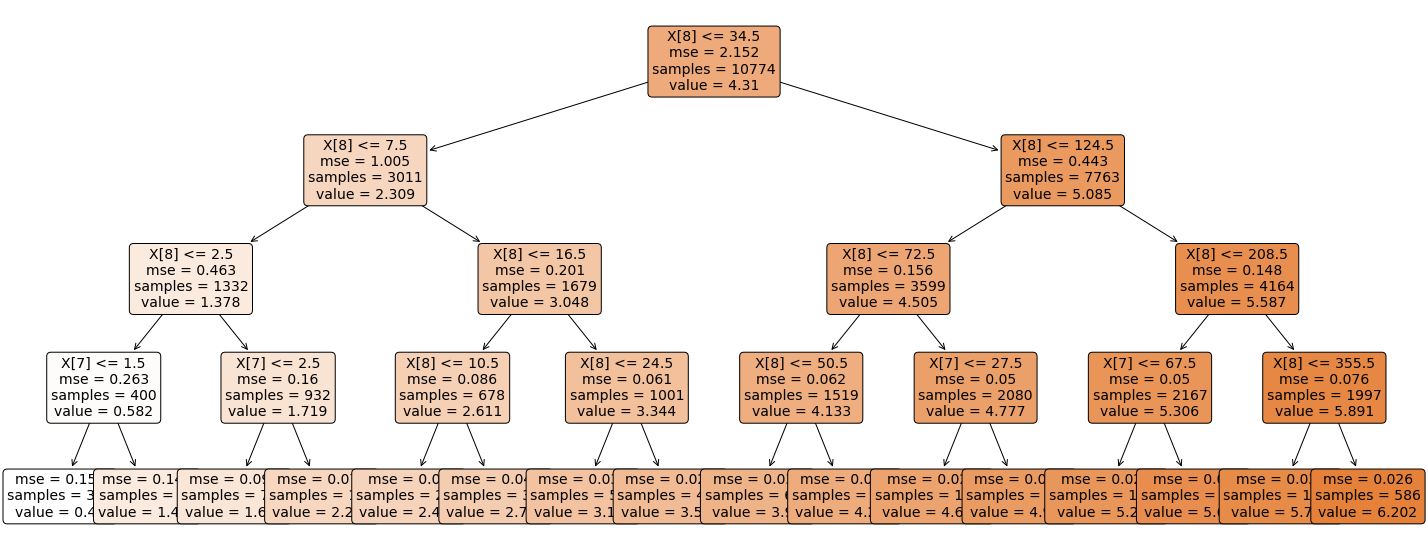

In [45]:
plt.figure(figsize=(25,10))
a = plot_tree(dt_reg,fontsize=14,filled=True,rounded=True)

In [46]:
predict = dt_reg.predict(X_val)
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.23951696559175872

The rmsle value has decreased to 0.171. 

## Model Building
## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)
#rf.score(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
prediction=rf.predict(X_val)

In [49]:
rmsle(y_val,prediction)

0.024995482597926333

The rmsle value has decreased to 0.0248 . This is a decent score. Let's now make predictions for the test dataset.

These are the log values and we have to convert them back to the original scale. 

In [50]:
test_prediction=rf.predict(test)

In [51]:
final_prediction = np.exp(test_prediction)
print(final_prediction)

[58.02733049 60.77861335 22.93570026 ... 90.09100084 60.84749298
 49.64093001]
